In [74]:
import pandas as pd
import tensorflow as tf

from window import WindowGenerator
from utils import train_test_val_split

In [75]:
def train_case(case_df, model, in_width, out_steps, max_epochs):
    """ Train model for given case df. """
    
    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)
    print(train_df.shape)
    print(test_df.shape)
    print(val_df.shape)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Dataset

In [76]:
case_1 = pd.read_csv("datasets/case_1.csv")
case_2 = pd.read_csv("datasets/case_2.csv")
case_3 = pd.read_csv("datasets/case_3.csv")
case_4 = pd.read_csv("datasets/case_4.csv")
case_5 = pd.read_csv("datasets/case_5.csv")

In [77]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets

In [78]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [79]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 20
features_size = len(label_columns)

print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s into de future.")
print(f"Using {IN_WIDTH*5/60}min of data to predict {OUT_STEPS*5/60}min into de future.")

Using 40s of data to predict 40s into de future.
Using 0.6666666666666666min of data to predict 0.6666666666666666min into de future.


In [80]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(20, activation='relu'), # 512
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

In [81]:
multi_linear_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 1

In [82]:
window, history = train_case(case_1, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

(128, 272)
(19, 272)
(36, 272)


2022-08-11 22:27:24.193209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-11 22:27:24.669892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [84]:
tf.keras.utils.plot_model(multi_linear_model, "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


label_col_index 135
label_col_index 135
label_col_index 135


2022-08-11 22:27:33.596174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


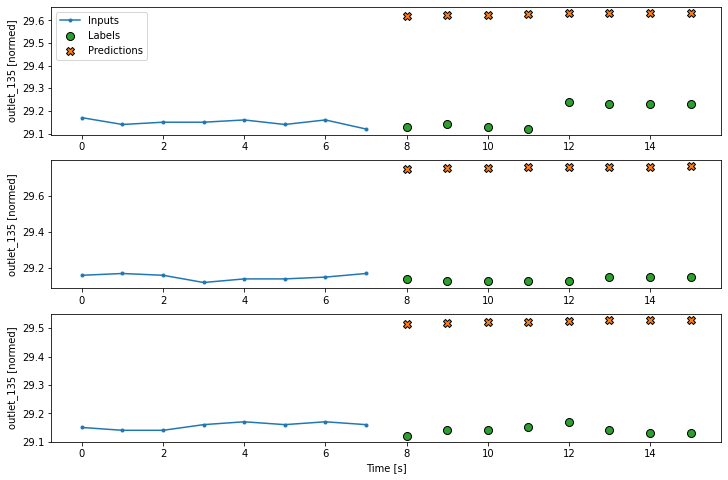

In [85]:
window.plot(multi_linear_model, plot_col="outlet_135")

In [86]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

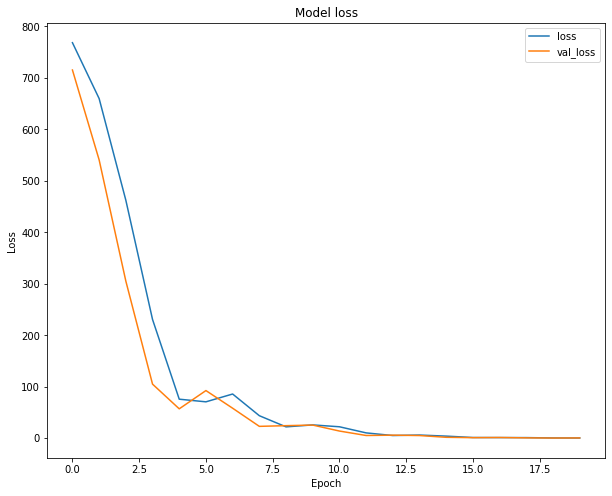

In [87]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

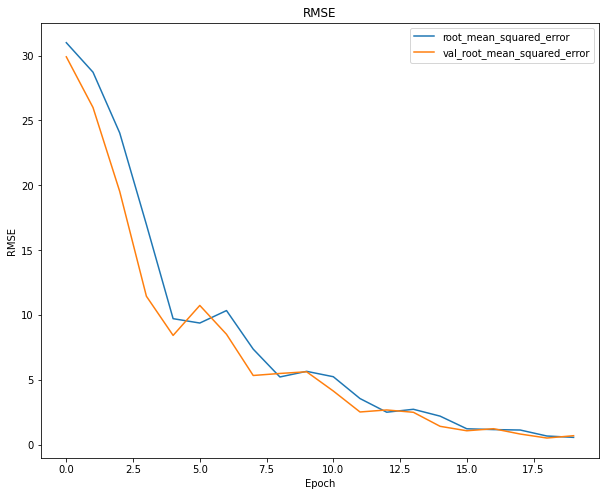

In [88]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [89]:
# window.test
multi_linear_model.evaluate(window.test)

1/1 [==============================] - 0s 266ms/step - loss: 0.4176 - root_mean_squared_error: 0.7130


[0.41764968633651733, 0.7130285501480103]

## Case 2

In [90]:
window, history = train_case(case_2, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

(142, 272)
(21, 272)
(41, 272)


label_col_index 135
label_col_index 135
label_col_index 135


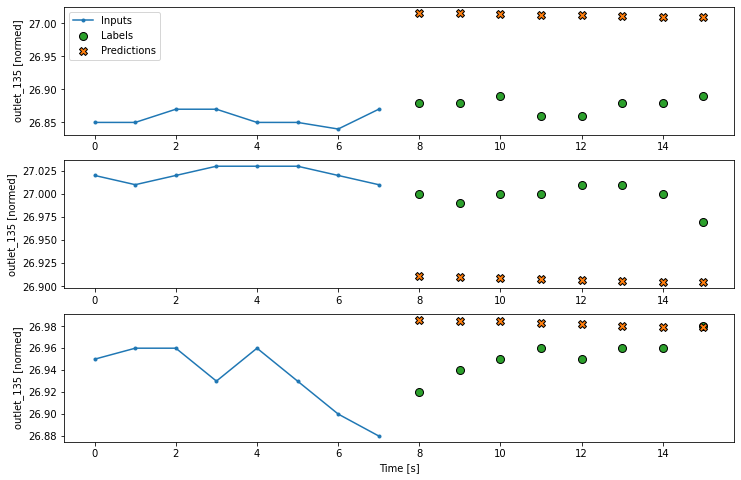

In [91]:
window.plot(multi_linear_model, plot_col="outlet_135")

In [92]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

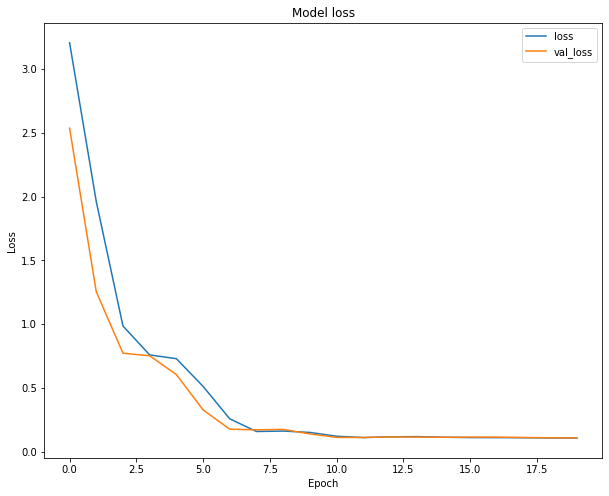

In [93]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

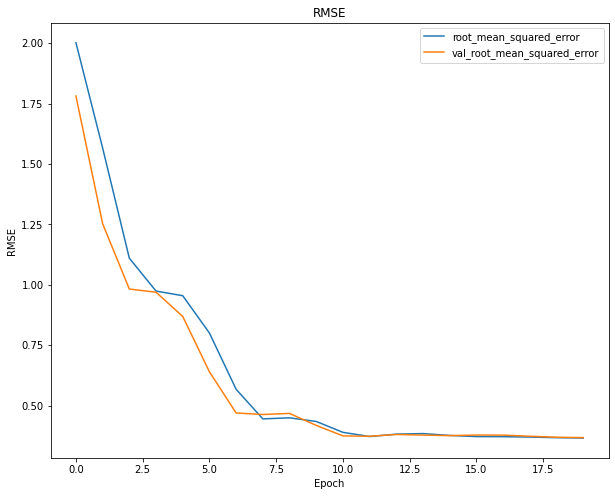

In [94]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [95]:
# window.test
multi_linear_model.evaluate(window.test)

1/1 [==============================] - 0s 262ms/step - loss: 0.1077 - root_mean_squared_error: 0.3630


[0.10767102241516113, 0.36296236515045166]

## Case 3

In [96]:
window, history = train_case(case_3, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

(147, 272)
(22, 272)
(42, 272)


label_col_index 135
label_col_index 135
label_col_index 135


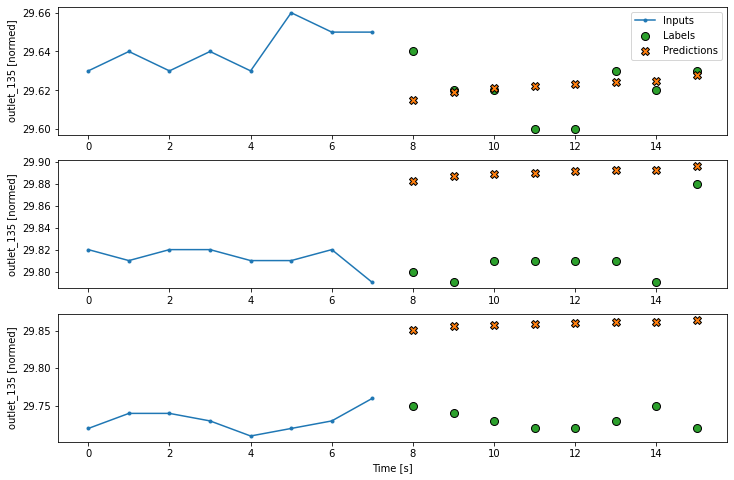

In [97]:
window.plot(multi_linear_model, plot_col="outlet_135")

In [98]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

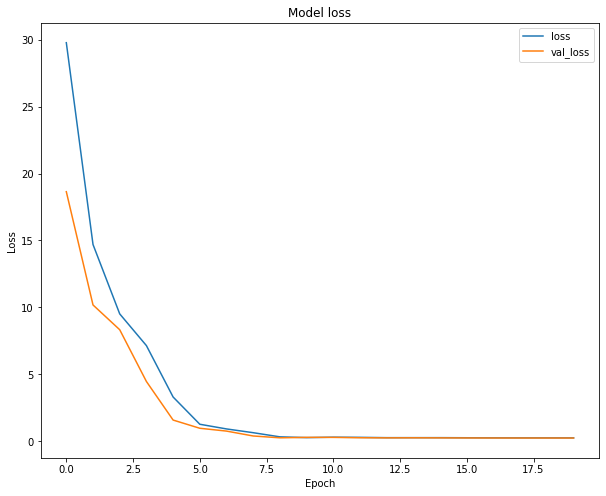

In [99]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

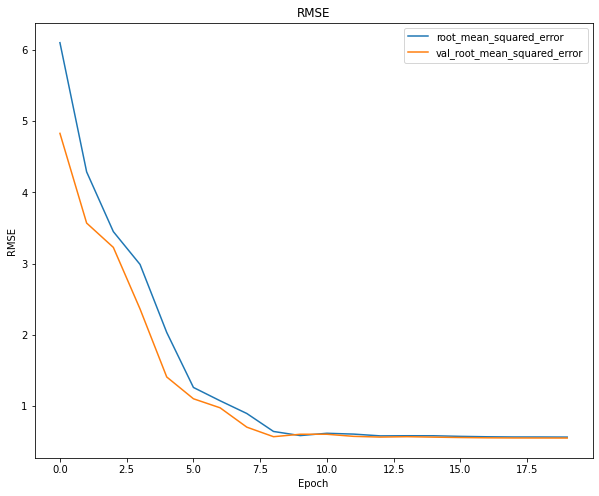

In [100]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [101]:
multi_linear_model.evaluate(window.test)

1/1 [==============================] - 0s 250ms/step - loss: 0.2168 - root_mean_squared_error: 0.5277


[0.2168203741312027, 0.5277118682861328]

## Case 4

In [102]:
window, history = train_case(case_4, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

(259, 272)
(38, 272)
(74, 272)


label_col_index 135
label_col_index 135
label_col_index 135


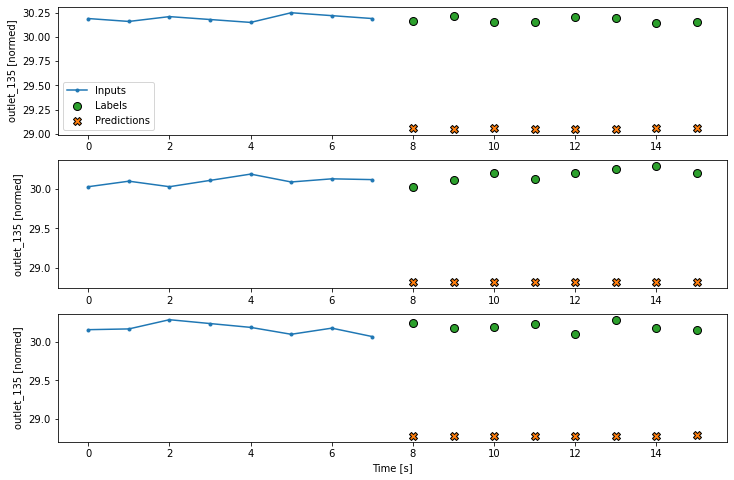

In [103]:
window.plot(multi_linear_model, plot_col="outlet_135")

In [104]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

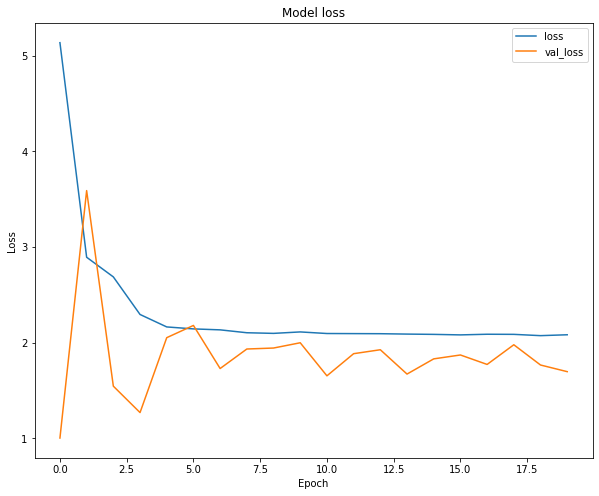

In [105]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

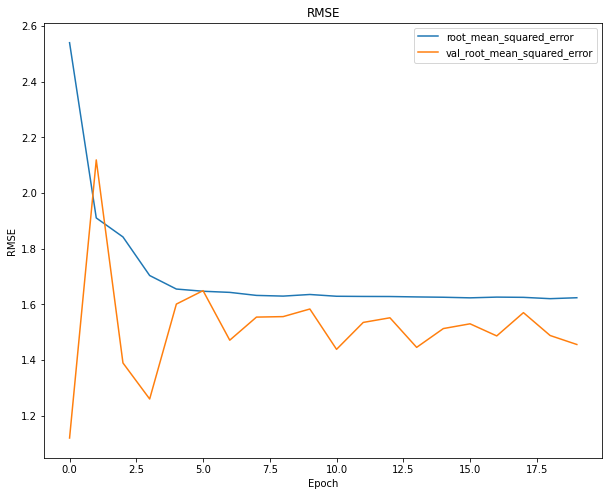

In [106]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [107]:
multi_linear_model.evaluate(window.test)

1/1 [==============================] - 0s 276ms/step - loss: 1.7629 - root_mean_squared_error: 1.4797


[1.7628579139709473, 1.4796600341796875]

## Case 5

In [108]:
window, history = train_case(case_5, multi_linear_model, IN_WIDTH, OUT_STEPS, MAX_EPOCHS)

(548, 272)
(79, 272)
(156, 272)


label_col_index 135
label_col_index 135
label_col_index 135


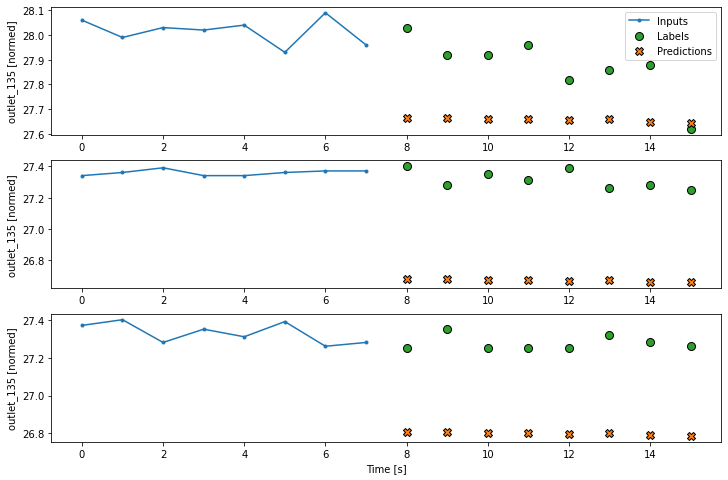

In [109]:
window.plot(multi_linear_model, plot_col="outlet_135")

In [110]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

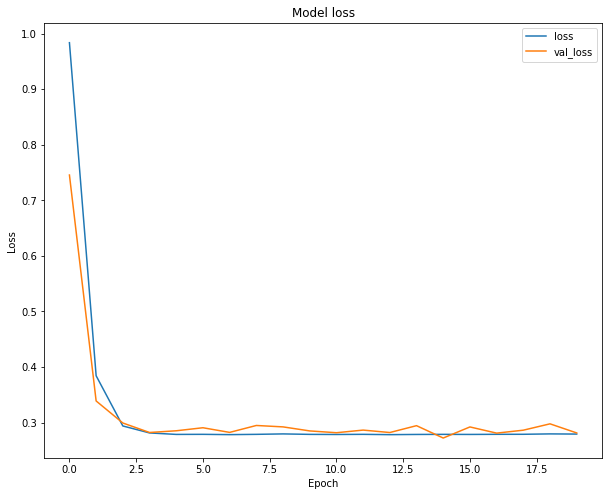

In [111]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

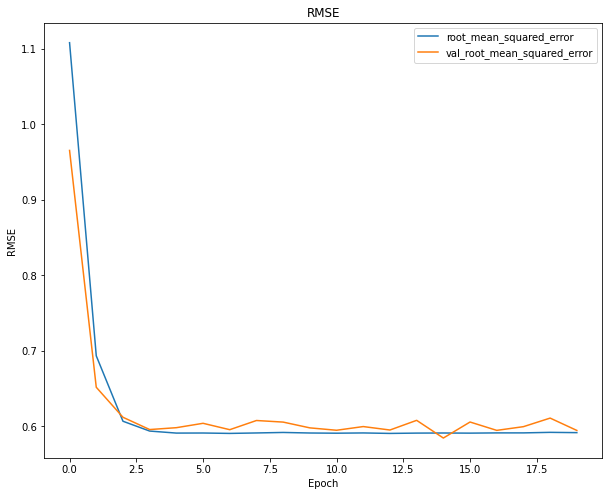

In [112]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [113]:
multi_linear_model.evaluate(window.test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3826 - root_mean_squared_error: 0.6935


[0.3826221227645874, 0.6934791207313538]